In [3]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv(r"C:\Users\Shivaji\Downloads\Wholesale customers data.csv")

In [5]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
df.shape

(440, 8)

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [9]:
df = df.drop('Channel', axis=1)  # Drop column 'Channel'


In [10]:
df

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,3,29703,12051,16027,13135,182,2204
436,3,39228,1431,764,4510,93,2346
437,3,14531,15488,30243,437,14841,1867
438,3,10290,1981,2232,1038,168,2125


In [11]:
df = df.drop(['Region','Fresh'],axis=1,errors='ignore')  # Drop column 'Channel'
df

,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9656,7561,214,2674,1338
1,9810,9568,1762,3293,1776
2,8808,7684,2405,3516,7844
3,1196,4221,6404,507,1788
4,5410,7198,3915,1777,5185
...,...,...,...,...,...
435,12051,16027,13135,182,2204
436,1431,764,4510,93,2346
437,15488,30243,437,14841,1867
438,1981,2232,1038,168,2125


In [12]:
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler()
x=stscaler.fit_transform(df)

In [13]:
x

array([[ 0.52356777, -0.04111489, -0.58936716, -0.04356873, -0.06633906],
       [ 0.54445767,  0.17031835, -0.27013618,  0.08640684,  0.08915105],
       [ 0.40853771, -0.0281571 , -0.13753572,  0.13323164,  2.24329255],
       ...,
       [ 1.31467078,  2.34838631, -0.54337975,  2.51121768,  0.12145607],
       [-0.51753572, -0.60251388, -0.41944059, -0.56977032,  0.21304614],
       [-0.5559243 , -0.57322717, -0.62009417, -0.50488752, -0.52286938]])

In [14]:
import scipy.cluster.hierarchy as sch

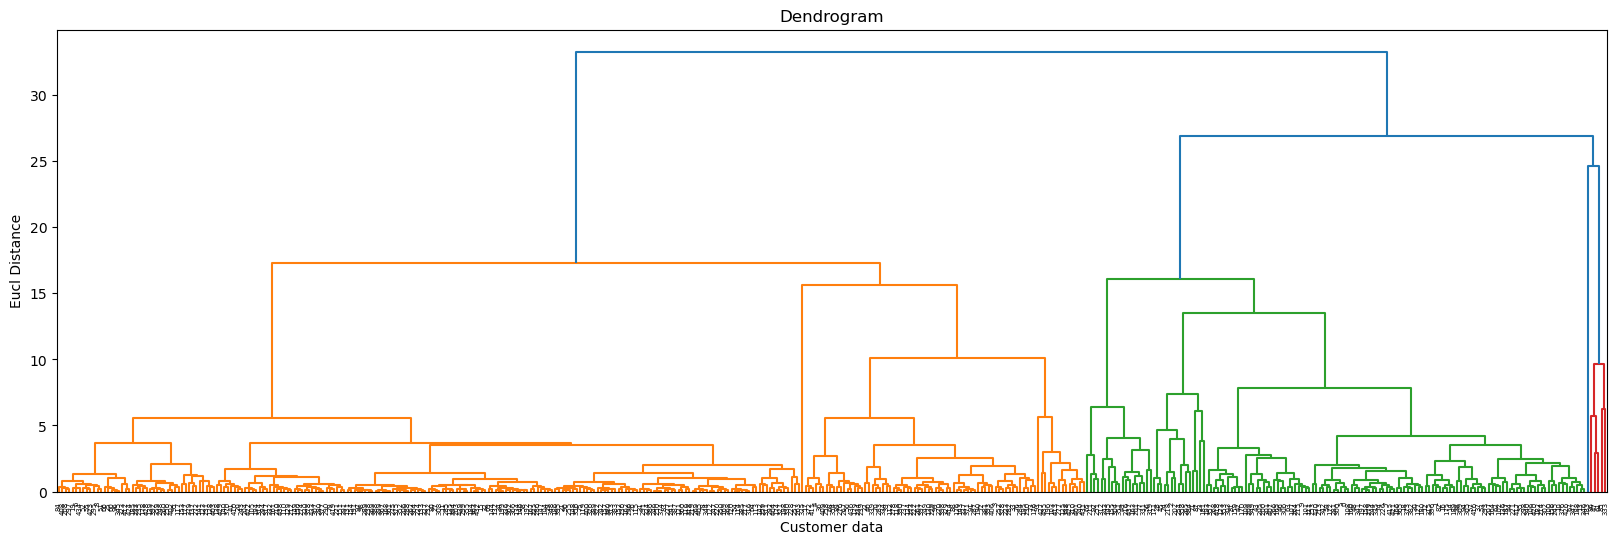

In [15]:
plt.figure(figsize=(20,6))
dendo = sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer data')
plt.ylabel('Eucl Distance')
plt.show()

In [16]:
len(set(dendo['color_list']))-1

3

In [34]:
from sklearn.cluster import AgglomerativeClustering
group=AgglomerativeClustering(n_clusters=3)
group.fit_predict(x)

array([2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 0, 2, 2, 1, 2,
       1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2,

In [36]:
cluster=group.fit_predict(x)

In [38]:
cluster

array([2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 0, 2, 2, 1, 2,
       1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2,

In [40]:
cluster.shape

(440,)

In [42]:
group_num=pd.DataFrame(cluster)

In [44]:
group_num

,0
0,2
1,2
2,2
3,1
4,1
...,...
435,1
436,1
437,2
438,1


In [46]:
pd,concat([df,group_num],axis=1)

NameError: name 'concat' is not defined